In [11]:
import pandas as pd
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [ ]:
nba_teams = teams.get_teams()

In [5]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key: [] for key in keys}

    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head(10)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [8]:
 df_warriors = df_teams[df_teams["nickname"] == "Warriors"]
df_warriors.head(5)

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [9]:
id_warriors = df_warriors[["id"]].values[0][0]
print(id_warriors)

1610612744


In [12]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [17]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,0022300673,2024-01-30,GSW vs. PHI,W,239,119,...,0.895,8.0,34.0,42.0,32,6,6,16,20,12.0
1,22023,1610612744,GSW,Golden State Warriors,0022300650,2024-01-27,GSW vs. LAL,L,289,144,...,0.688,11.0,39.0,50.0,37,11,3,17,34,-1.0
2,22023,1610612744,GSW,Golden State Warriors,0022300632,2024-01-25,GSW vs. SAC,L,239,133,...,0.783,6.0,27.0,33.0,30,7,3,13,19,-1.0
3,22023,1610612744,GSW,Golden State Warriors,0022300626,2024-01-24,GSW vs. ATL,W,240,134,...,0.727,11.0,38.0,49.0,26,6,9,10,18,22.0
4,22023,1610612744,GSW,Golden State Warriors,0022300560,2024-01-15,GSW @ MEM,L,241,107,...,0.900,7.0,38.0,45.0,28,4,6,19,25,-9.0


In [31]:
games_home = games[games["MATCHUP"] == "GSW vs. TOR"]
games_away = games[games["MATCHUP"]== "GSW @ TOR"]

In [27]:
import matplotlib.pyplot as plt

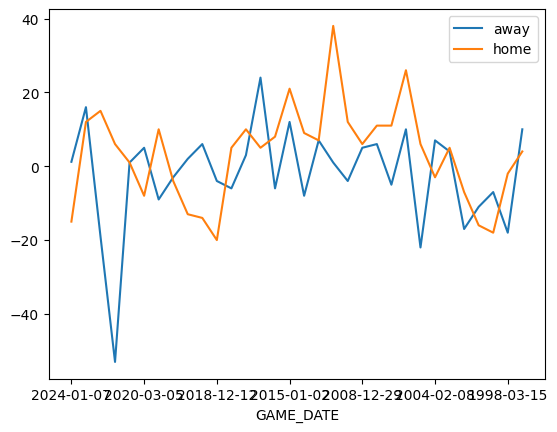

In [32]:
fig, ax = plt.subplots()
games_away.plot(x="GAME_DATE", y="PLUS_MINUS", ax=ax)
games_home.plot(x="GAME_DATE", y="PLUS_MINUS", ax=ax)
ax.legend(["away", "home"])
plt.show()

ModuleNotFoundError: No module named 'Ipython'